In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('/content/Sonar.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [80]:
print(data.shape)
data.info

(208, 61)


<bound method DataFrame.info of          0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...   

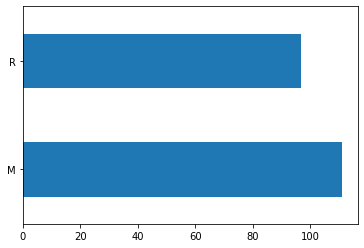

In [81]:
data[60].value_counts().plot(kind='barh')

In [82]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [83]:
y = pd.get_dummies(y)
y

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


In [84]:
rocks_y = y['R']
mines_y = y['M']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,rocks_y,test_size=0.25)

In [86]:
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# pca = PCA(n_components=3)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# ex_var = pca.explained_variance_ratio_
# print(sum(ex_var))

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.75


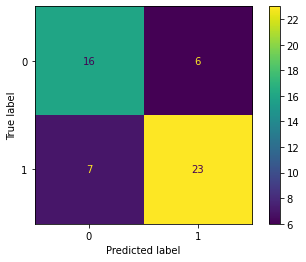

In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Text(0.5, 1.0, 'no_of_depth vs accuracy')

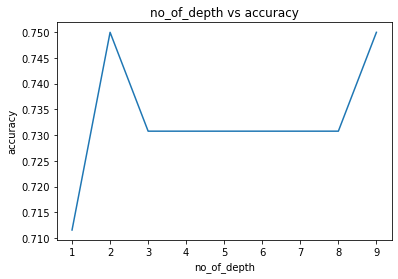

In [93]:
from sklearn.metrics import accuracy_score

accuracies=[]
for no_of_depth in range(1,10,1):
  dtree = DecisionTreeClassifier()
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracies.append(accuracy)
    

plt.plot(range(1,10,1),accuracies)
plt.xlabel('no_of_depth')
plt.ylabel('accuracy')
plt.title('no_of_depth vs accuracy')